In [1]:
from __future__ import print_function, division
__author__='Shalmali'

import geopandas as gp
import pandas as pd
import pylab as pl
pl.style.use('seaborn-bright')
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
import get_csv      # function to download energy csv file 
import get_shape    # function to download shape file 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# download the LL84 data using the script for function definition. 
get_csv.getEnergycsv()

Downloading
file in place, you can continue


In [3]:
nrg = pd.read_csv(os.getenv('PUIDATA') + '/' + 'm46j-75iy.csv')
nrg.head(3)

,automatic_water_benchmarking_eligible,bbls_co_reported,borough,co_reported_bbl_status,direct_ghg_emissions_mtco2e,dof_benchmarking_submission_status,dof_number_of_buildings,dof_property_floor_area_buildngs_and_parking_ft2,energy_star_score,indirect_ghg_emissions_mtco2e,...,reported_property_floor_area_building_s_ft,reported_water_method,site_eui_kbtu_ft2,source_eui_kbtu_ft2,street_name,street_number,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code
0,NaN,1000410001,Manhattan,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,918919,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN
1,Yes,NaN,Queens,NaN,NaN,No Submission Matched to BBL,1.0,82730.0,NaN,NaN,...,NaN,None,NaN,NaN,108 STREET,63-10,NaN,NaN,NaN,11375.0
2,NaN,2027620097,Bronx,NaN,NaN,BBL not valid,NaN,NaN,Not Available,NaN,...,64200,NaN,NaN,NaN,NaN,NaN,NaN,Not Available,Not Available,NaN


In [4]:
# Loading PLUTO data
get_shape.getshapecsv()

Downloading
Unzipped
file in place, you can continue


In [5]:
bsize = gp.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/' + 'Manhattan/MNMapPLUTO.shp')
bsize.head(3)

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."


In [6]:
nrg.columns

Index(['automatic_water_benchmarking_eligible', 'bbls_co_reported', 'borough',
       'co_reported_bbl_status', 'direct_ghg_emissions_mtco2e',
       'dof_benchmarking_submission_status', 'dof_number_of_buildings',
       'dof_property_floor_area_buildngs_and_parking_ft2', 'energy_star_score',
       'indirect_ghg_emissions_mtco2e',
       'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       'nyc_borough_block_and_lot_bbl', 'primary_property_type_self_selected',
       'record_number', 'reported_nyc_building_identificaiton_numbers_bins',
       'reported_property_floor_area_building_s_ft', 'reported_water_method',
       'site_eui_kbtu_ft2', 'source_eui_kbtu_ft2', 'street_name',
       'street_number', 'total_ghg_emissions_mtco2e',
       'weather_normalized_site_eui_kbtu_ft2',
       'weather_normalized_source_eui_kbtu_ft2', 'zip_code'],
      dtype='object')

In [7]:
bsize.columns

Index(['APPBBL', 'APPDate', 'Address', 'AllZoning1', 'AllZoning2',
       'AreaSource', 'AssessLand', 'AssessTot', 'BBL', 'BldgArea', 'BldgClass',
       'BldgDepth', 'BldgFront', 'Block', 'BoroCode', 'Borough', 'BsmtCode',
       'BuiltCode', 'BuiltFAR', 'CB2010', 'CD', 'CT2010', 'ComArea', 'CommFAR',
       'CondoNo', 'Council', 'EDesigNum', 'Easements', 'ExemptLand',
       'ExemptTot', 'Ext', 'FacilFAR', 'FactryArea', 'FireComp', 'GarageArea',
       'HealthArea', 'HistDist', 'IrrLotCode', 'LandUse', 'Landmark', 'Lot',
       'LotArea', 'LotDepth', 'LotFront', 'LotType', 'LtdHeight', 'MAPPLUTO_F',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'OtherArea', 'Overlay1',
       'Overlay2', 'OwnerName', 'OwnerType', 'PLUTOMapID', 'PolicePrct',
       'ProxCode', 'ResArea', 'ResidFAR', 'RetailArea', 'SHAPE_Area',
       'SHAPE_Leng', 'SPDist1', 'SPDist2', 'Sanborn', 'SanitBoro', 'SanitDist',
       'SanitSub', 'SchoolDist', 'SplitZone', 'StrgeArea', 'TaxMap',
       'Tract2010', 'UnitsRe

In [8]:
# Droping redundant variables
bsize_short = bsize[['BBL', 'UnitsTotal']]
bsize_short.head()

,BBL,UnitsTotal
0,1.015450e+09,18
1,1.007238e+09,50
2,1.016800e+09,10
3,1.013850e+09,32
4,1.011970e+09,26


In [9]:
bsize_short.describe()

,BBL,UnitsTotal
count,4.269700e+04,42697.000000
mean,1.012295e+09,24.545799
std,6.104073e+06,92.907025
min,1.000010e+09,0.000000
25%,1.007000e+09,2.000000
50%,1.012510e+09,8.000000
75%,1.017560e+09,20.000000
max,1.022552e+09,8805.000000


In [10]:
# Droping redundant variables from energy dataframe 
nrg.drop(['automatic_water_benchmarking_eligible', 'bbls_co_reported',
          'co_reported_bbl_status', 'direct_ghg_emissions_mtco2e',
       'dof_benchmarking_submission_status','dof_property_floor_area_buildngs_and_parking_ft2',
       'energy_star_score', 'indirect_ghg_emissions_mtco2e',
       'municipally_supplied_potable_water_indoor_intensity_gal_ft',
       'primary_property_type_self_selected', 'record_number',
       'reported_nyc_building_identificaiton_numbers_bins', 'reported_water_method',
       'street_name', 'street_number'], axis = 1, inplace = True)

In [11]:
print (nrg.shape)

(16170, 10)


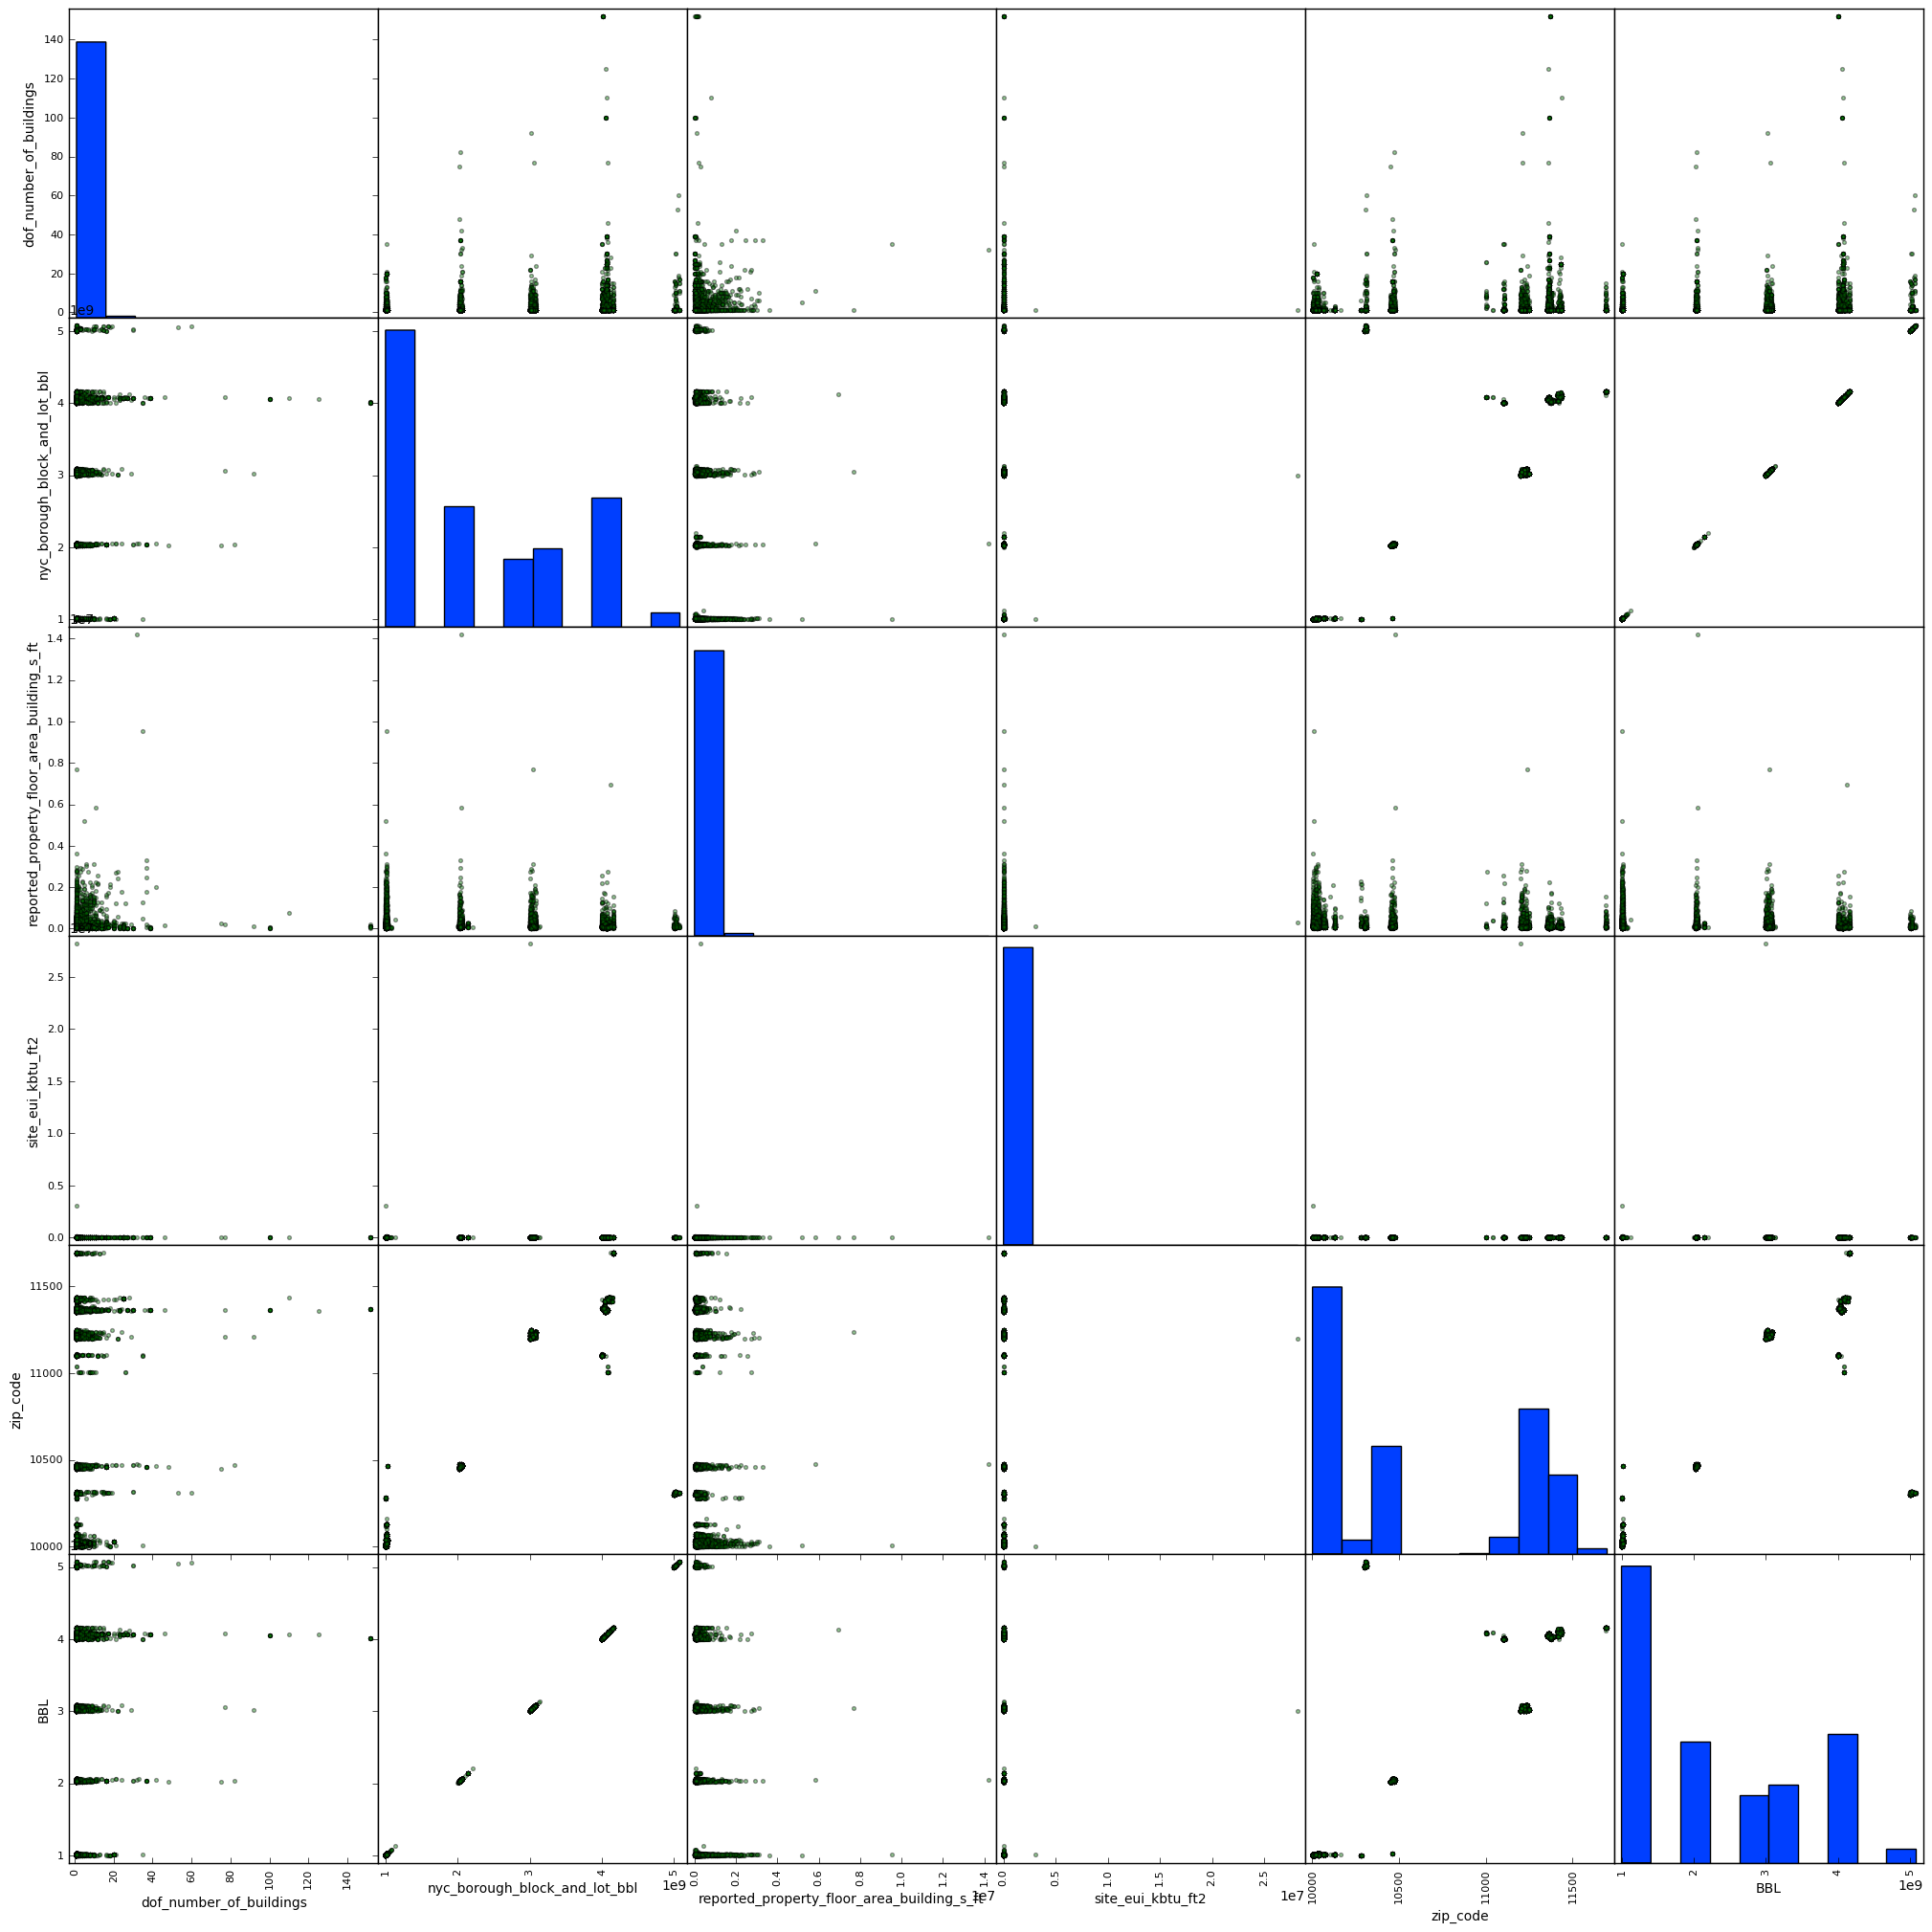

In [24]:
pd.scatter_matrix (nrg, alpha= 0.4, s=30, figsize=(25, 25), diagonal='hist', c='g')
pl.show()

### Figure 1: Scatter Matrix for Energy consumption dataset.
#### This plots each column against each other. The Diagonal plots are against themselves and gives us an idea of how the distributed. This is a great way to begin inspecting the data for large datasets. 
In this case few plots dont make any sense as those columns are for different purposes e.g. BBL column or borough column

In [14]:
# Convert variables to numeric values
nrg['site_eui_kbtu_ft2'] = pd.to_numeric(nrg['site_eui_kbtu_ft2'], errors='coerce')
nrg['reported_property_floor_area_building_s_ft'] = pd.to_numeric(nrg['reported_property_floor_area_building_s_ft'], 
                                                                        errors='coerce')
# convert to numeric as well as rename the column to merge with this common column
nrg['BBL'] = pd.to_numeric(nrg['nyc_borough_block_and_lot_bbl'], errors='coerce')
# another way to rename by using 'rename' function. 
#nrg.rename(columns={'nyc_borough_block_and_lot_bbl':'BBL'}, inplace=True) 

### Merge the Dataset:
To merge the datasets we need a common column: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. Create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

In [15]:
#merge the data on BBL - the common column in both the dataframes. 
bblnrgdata = pd.merge(nrg, bsize_short, on='BBL')

In [16]:
bblnrgdata.head(3)

,borough,dof_number_of_buildings,nyc_borough_block_and_lot_bbl,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,source_eui_kbtu_ft2,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code,BBL,UnitsTotal
0,Manhattan,1.0,1.006700e+09,NaN,NaN,NaN,NaN,NaN,NaN,10001.0,1.006700e+09,1
1,Manhattan,1.0,1.004370e+09,NaN,NaN,NaN,NaN,NaN,NaN,10009.0,1.004370e+09,4
2,Manhattan,1.0,1.013110e+09,330000.0,125.4,239.8,3556.4,123.8,237.9,10022.0,1.013110e+09,56


In [17]:
bblnrgdata.shape

(6492, 12)

In [18]:
bblnrgdata.dtypes

borough                                        object
dof_number_of_buildings                       float64
nyc_borough_block_and_lot_bbl                 float64
reported_property_floor_area_building_s_ft    float64
site_eui_kbtu_ft2                             float64
source_eui_kbtu_ft2                            object
total_ghg_emissions_mtco2e                     object
weather_normalized_site_eui_kbtu_ft2           object
weather_normalized_source_eui_kbtu_ft2         object
zip_code                                      float64
BBL                                           float64
UnitsTotal                                      int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f054e434f60>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f054e0f6da0>]], dtype=object)

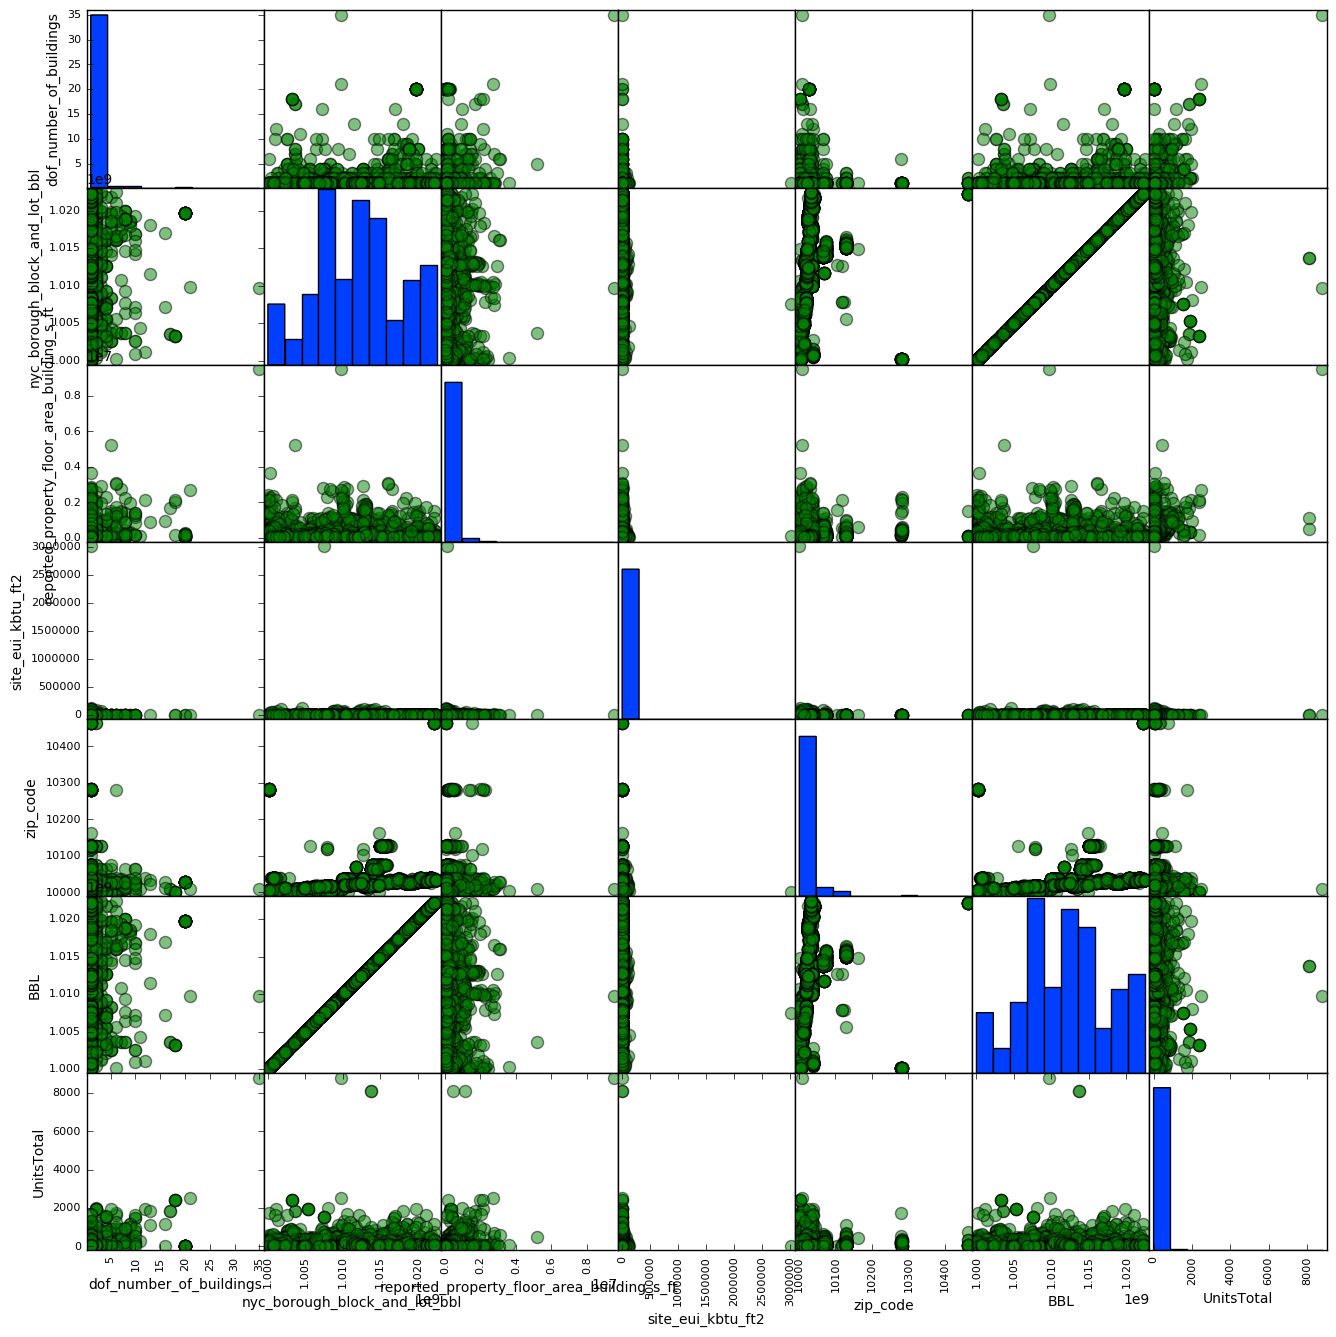

In [25]:
pd.scatter_matrix (bblnrgdata, s=300, figsize=(16, 16), c='g')

### Figure 2: Scatter Matrix for merged dataset

In [19]:
bblnrgdata.dropna(inplace=True)

In [20]:
bblnrgdata.shape

(4683, 12)

once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

In [21]:
bblnrgdata['total_energy'] = bblnrgdata.site_eui_kbtu_ft2 * bblnrgdata.reported_property_floor_area_building_s_ft
bblnrgdata.head(5)

,borough,dof_number_of_buildings,nyc_borough_block_and_lot_bbl,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,source_eui_kbtu_ft2,total_ghg_emissions_mtco2e,weather_normalized_site_eui_kbtu_ft2,weather_normalized_source_eui_kbtu_ft2,zip_code,BBL,UnitsTotal,total_energy
2,Manhattan,1.0,1.013110e+09,330000.0,125.4,239.8,3556.4,123.8,237.9,10022.0,1.013110e+09,56,41382000.0
15,Manhattan,1.0,1.007660e+09,59468.0,122.3,347,584.4,122.4,347.3,10011.0,1.007660e+09,8,7272936.4
16,Manhattan,1.0,1.008150e+09,364000.0,117.0,257,3613,115.9,255.7,10018.0,1.008150e+09,24,42588000.0
18,Manhattan,1.0,1.005050e+09,235370.0,82.1,201.3,1392.3,81.9,201.2,10013.0,1.005050e+09,24,19323877.0
19,Manhattan,1.0,1.021420e+09,64806.0,137.7,192.5,673.6,137.5,192.1,10032.0,1.021420e+09,62,8923786.2


In [22]:
bblnrgdata['total_energy'].describe()

count    4.683000e+03
mean     2.255409e+08
std      5.454711e+09
min      0.000000e+00
25%      5.985396e+06
50%      9.482455e+06
75%      1.875796e+07
max      3.501452e+11
Name: total_energy, dtype: float64

In [23]:
# Cleaning Data and filtering data
#Total no. of Units = 0 is an incorrect value and an outlier, hence I would consider buildings wit a minimum of one unit and more. 
#Energy Consumption = 0 is possible only if the building is non-operating, and such buildings are not relevant to our model
#so thet are considered as outliers

bblnrgdata_refined = bblnrgdata[bblnrgdata['total_energy'] > 0 ]
bblnrgdata_refined = bblnrgdata_refined[bblnrgdata_refined['UnitsTotal'] > 1]

# Removing building units that are too high(more than 1000), because they are high leverage points but they maybe important.
# However, I am throwing them away functionally for my analysis to work
bblnrgdata_refined = bblnrgdata_refined[bblnrgdata_refined['UnitsTotal'] <= 1000]
bblnrgdata_refined.drop(['nyc_borough_block_and_lot_bbl', 'dof_number_of_buildings',
          'source_eui_kbtu_ft2', 'weather_normalized_site_eui_kbtu_ft2',
       'weather_normalized_source_eui_kbtu_ft2'], axis = 1, inplace = True)

In [24]:
print (bblnrgdata_refined.shape)

(4311, 8)


In [25]:
bblnrgdata_refined.describe()

,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,zip_code,BBL,UnitsTotal,total_energy
count,4.311000e+03,4311.000000,4311.000000,4.311000e+03,4311.000000,4.311000e+03
mean,1.997416e+05,558.668638,10029.066342,1.012210e+09,109.580608,1.400252e+08
std,2.691316e+05,5599.231022,34.849438,5.442853e+06,125.014575,1.813318e+09
min,2.700000e+03,0.100000,10001.000000,1.000048e+09,2.000000,5.344000e+03
25%,7.383900e+04,66.100000,10014.000000,1.008365e+09,36.000000,6.011774e+06
50%,1.169080e+05,82.600000,10022.000000,1.012480e+09,69.000000,9.330486e+06
75%,2.110740e+05,101.950000,10031.000000,1.015219e+09,133.000000,1.779425e+07
max,5.207812e+06,112726.600000,10463.000000,1.022500e+09,997.000000,6.779388e+10


**Make a  scatter plot first of Energy vs Units. It will look really bad because all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **

I intend to limit the number of units to 800 so that the plot is little zoomed in.  
Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,8000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

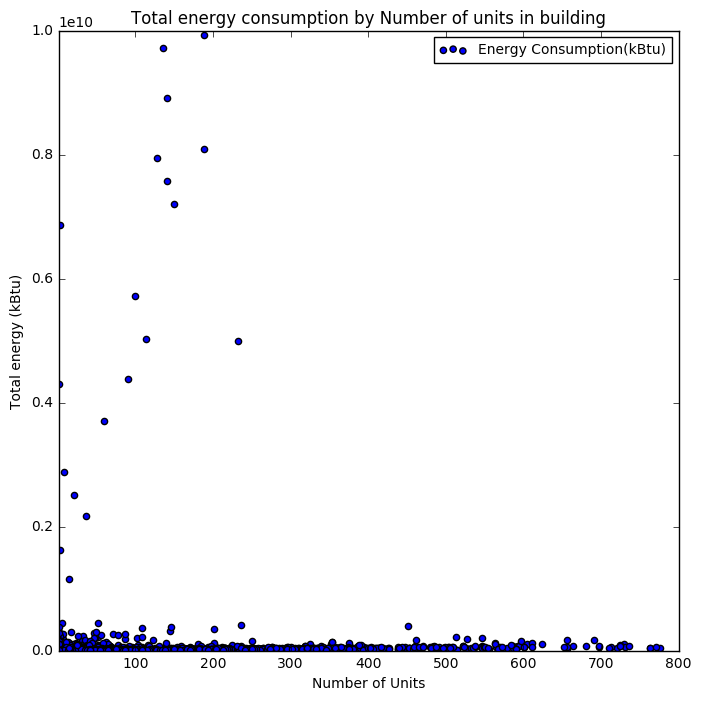

In [37]:
pl.figure(figsize=(8,8))
pl.scatter(bblnrgdata_refined.UnitsTotal, bblnrgdata_refined.total_energy, label = 'Energy Consumption(kBtu)')
pl.ylim(1000,1e10)
pl.xlim(1,800)
pl.title('Total energy consumption by Number of units in building')
pl.ylabel('Total energy (kBtu)')
pl.xlabel('Number of Units')
pl.legend(fontsize=10)

## Figure 3: Total energy consumption against number of units. 

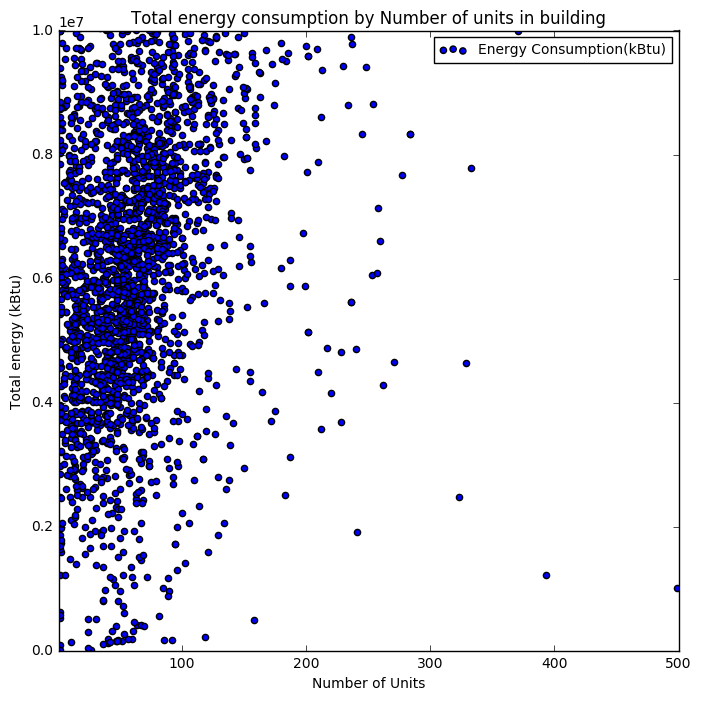

In [38]:
pl.figure(figsize=(8,8))
pl.scatter(bblnrgdata_refined.UnitsTotal, bblnrgdata_refined.total_energy, label = 'Energy Consumption(kBtu)')
pl.ylim(1000,1e07)
pl.xlim(1,500)
pl.title('Total energy consumption by Number of units in building')
pl.ylabel('Total energy (kBtu)')
pl.xlabel('Number of Units')
pl.legend(fontsize=10)

## Figure 4: Scale energy consumption against Number of units. 
#### This plot is zoomed up for clear picture of the distribution. 

**Try to make a log plot instead**. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.


In [26]:
bblnrgdata_refined['UnitsTotal_log'] = np.log10(bblnrgdata_refined.UnitsTotal)
bblnrgdata_refined['TotEnergy_log'] = np.log10(bblnrgdata_refined.total_energy)
bblnrgdata_refined['UnitsTotal_log_sq'] = bblnrgdata_refined.UnitsTotal_log**2
bblnrgdata_refined.describe()

,reported_property_floor_area_building_s_ft,site_eui_kbtu_ft2,zip_code,BBL,UnitsTotal,total_energy,UnitsTotal_log,TotEnergy_log,UnitsTotal_log_sq
count,4.311000e+03,4311.000000,4311.000000,4.311000e+03,4311.000000,4.311000e+03,4311.000000,4311.000000,4311.000000
mean,1.997416e+05,558.668638,10029.066342,1.012210e+09,109.580608,1.400252e+08,1.792733,7.047421,3.484793
std,2.691316e+05,5599.231022,34.849438,5.442853e+06,125.014575,1.813318e+09,0.520541,0.496458,1.710280
min,2.700000e+03,0.100000,10001.000000,1.000048e+09,2.000000,5.344000e+03,0.301030,3.727866,0.090619
25%,7.383900e+04,66.100000,10014.000000,1.008365e+09,36.000000,6.011774e+06,1.556303,6.779003,2.422077
50%,1.169080e+05,82.600000,10022.000000,1.012480e+09,69.000000,9.330486e+06,1.838849,6.969904,3.381366
75%,2.110740e+05,101.950000,10031.000000,1.015219e+09,133.000000,1.779425e+07,2.123852,7.250280,4.510746
max,5.207812e+06,112726.600000,10463.000000,1.022500e+09,997.000000,6.779388e+10,2.998695,10.831190,8.992173


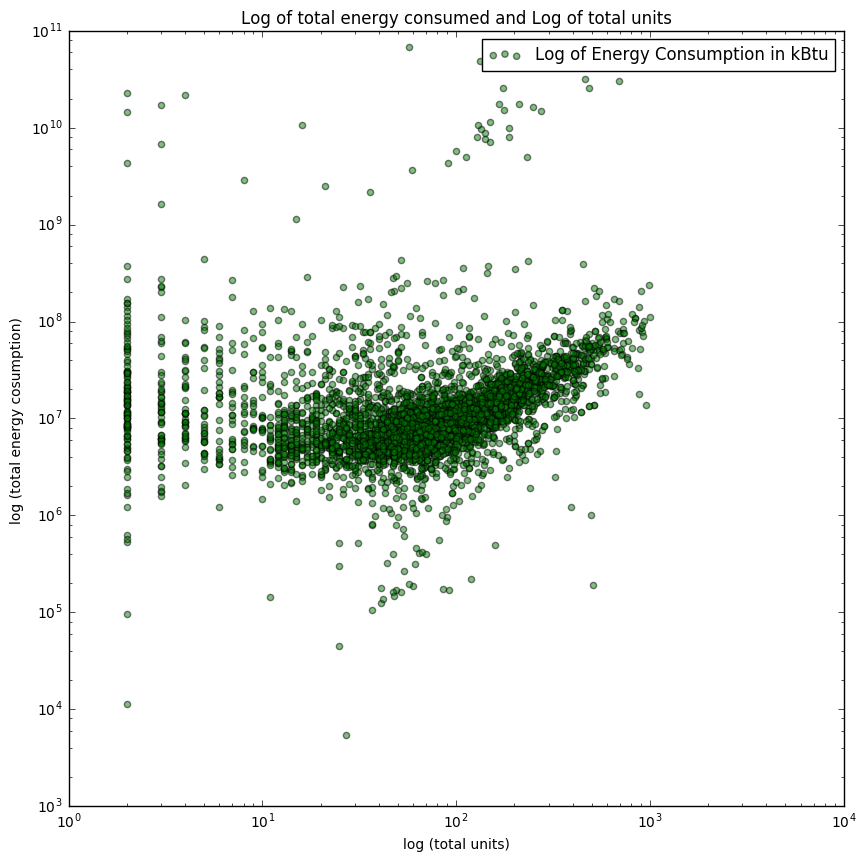

In [40]:
# Plot the log of the two variables.
bblnrgdata_refined.plot(kind="scatter", x="UnitsTotal", y="total_energy", loglog = True, figsize=(10,10), c='g', alpha =0.5,
                        label = 'Log of Energy Consumption in kBtu')
pl.ylabel('log (total energy cosumption) ')
pl.xlabel('log (total units)')
pl.title('Log of total energy consumed and Log of total units')
pl.show()

## Figure 5: Log of Total unit against log of total energy consumption

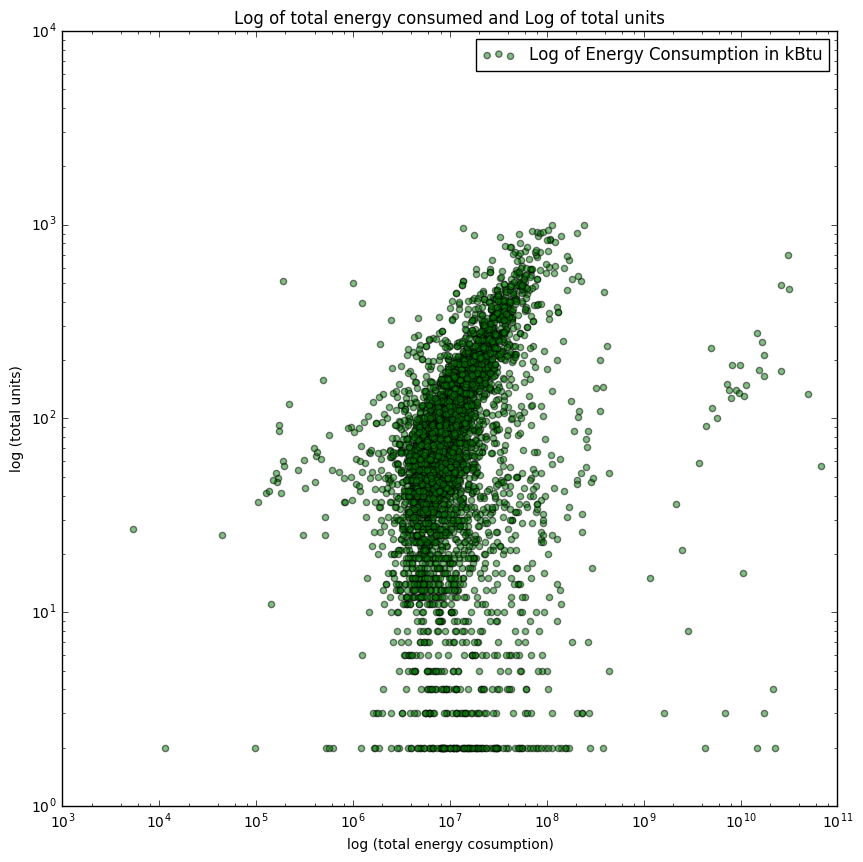

In [41]:
# Plot the log of the two variables.
bblnrgdata_refined.plot(kind="scatter", x="total_energy", y="UnitsTotal", loglog = True, figsize=(10,10), c='g', alpha =0.5,
                        label = 'Log of Energy Consumption in kBtu')
pl.xlabel('log (total energy cosumption)')
pl.ylabel('log (total units)')
pl.title('Log of total energy consumed and Log of total units')
pl.show()

## Figure 6: Log of total energy against log of total units in a building.

A hint of linear relation is seen in from the log plots. 

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

## Predicting total energy consumption given the total units

In [42]:
y = bblnrgdata_refined.TotEnergy_log
X = sm.add_constant(bblnrgdata_refined.UnitsTotal_log)

In [43]:
model = sm.OLS(y, X, missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotEnergy_log   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     211.5
Date:                Tue, 18 Oct 2016   Prob (F-statistic):           8.09e-47
Time:                        22:55:40   Log-Likelihood:                -2994.4
No. Observations:                4311   AIC:                             5993.
Df Residuals:                    4309   BIC:                             6006.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const              6.6776      0.026    252.172      0.000         6.626     6.729
UnitsTotal_log     0.2063      0.014     14.544      0.000         0.178     0.234
==============================================================================
Omnibus:                     2173.812   Durbin-Watson:                   1.640
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35410.617
Skew:                           2.010   Prob(JB):                         0.00
Kurtosis:                      16.453   Cond. No.                         8.50
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

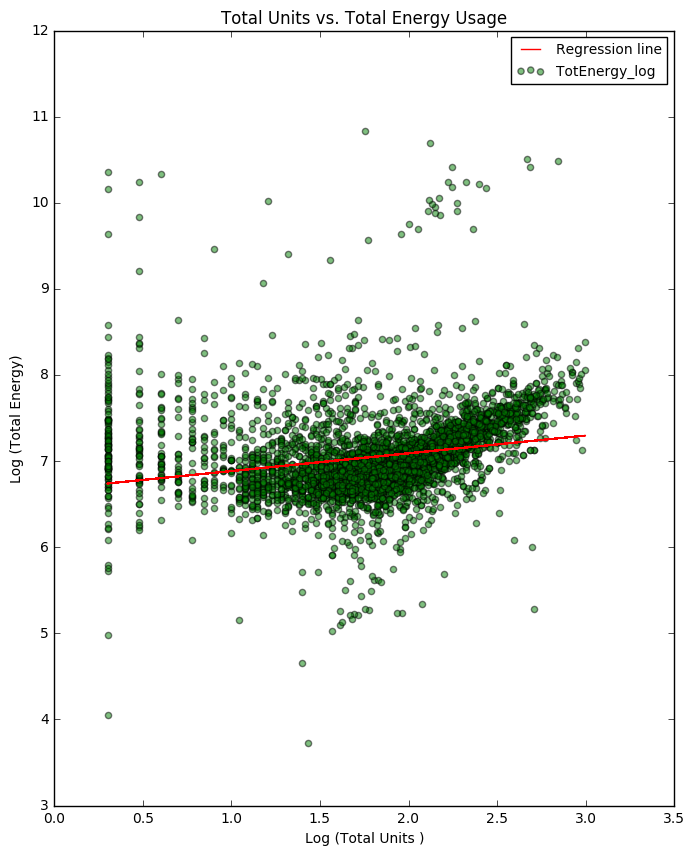

In [47]:
y_fit = model.predict(X)
pl.figure(figsize=(8,10))
xlabel('Log (Total Units )')
ylabel('Log (Total Energy)')
pl.title('Total Units vs. Total Energy Usage')
pl.scatter(bblnrgdata_refined.UnitsTotal_log, y, alpha=.5, s=20, c='g')
pl.plot(bblnrgdata_refined.UnitsTotal_log, y_fit, color = 'r', label = 'Regression line')
pl.legend(fontsize=10)
pl.show()

## Figure 7 : Showing the regresion line fitted after training the first model (log of Total Units Number as independent variable and log of Total Energy as dependent variable)

## Predicting total units given total energy consumption

In [48]:
y2 = bblnrgdata_refined.UnitsTotal_log
X2 = sm.add_constant(bblnrgdata_refined.TotEnergy_log)

In [49]:
model2 = sm.OLS(y2, X2, missing='drop').fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         UnitsTotal_log   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     211.5
Date:                Tue, 18 Oct 2016   Prob (F-statistic):           8.09e-47
Time:                        22:58:07   Log-Likelihood:                -3198.7
No. Observations:                4311   AIC:                             6401.
Df Residuals:                    4309   BIC:                             6414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.1943      0.110      1.764      0.078        -0.022     0.410
TotEnergy_log     0.2268      0.016     14.544      0.000         0.196     0.257
==============================================================================
Omnibus:                      769.686   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1370.873
Skew:                          -1.133   Prob(JB):                    2.08e-298
Kurtosis:                       4.579   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

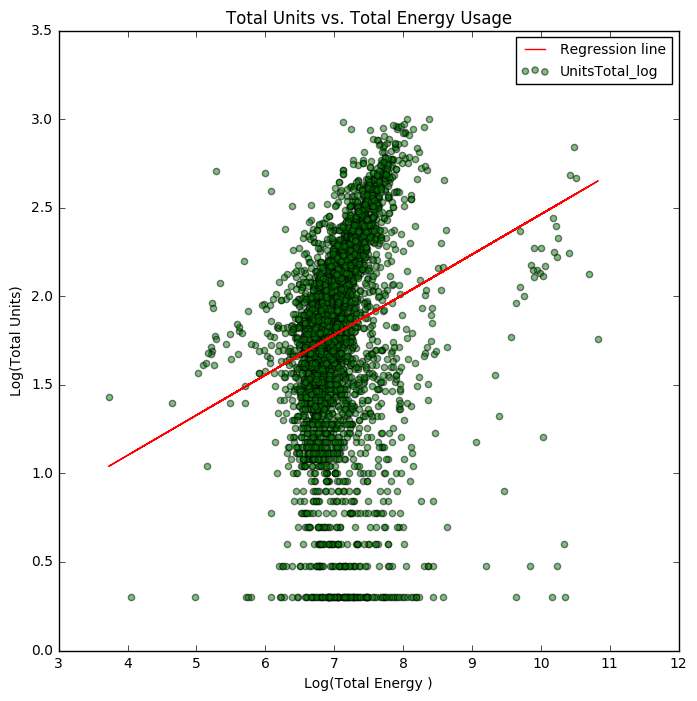

In [50]:
y_fit2 = model2.predict(X2)
pl.figure(figsize=(8,8))
xlabel('Log(Total Energy )')
ylabel('Log(Total Units)')
pl.title('Total Units vs. Total Energy Usage')
pl.scatter(bblnrgdata_refined.TotEnergy_log, y2, alpha=.5, s=20, c='g')
pl.plot(bblnrgdata_refined.TotEnergy_log, y_fit2, color = 'r', label = 'Regression line')
pl.legend(fontsize=10)
pl.show()

## Figure 8: Showing the regresion line fitted after training the second model (Total Energy Usage as independent variable)



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



## Chi square Test

In [51]:
# Calculate chi square statistic 
chisq1 = np.sum(((y_fit - y)**2)/np.sqrt(y)**2)
chisq2 = np.sum(((y_fit2 - y2)**2)/np.sqrt(y2)**2)
print ('Chi Square for Model 1(Units(x) vs Energy(y)):', chisq1)
print ('Chi Square for Model 2(Energy(x) vs Units(y)):', chisq2)
if chisq1 < chisq2:
    print ('\nModel 1 is better fit than Model 2')
else:
    print ('\nModel 2 is better fit than Model 1')

Chi Square for Model 1(Units(x) vs Energy(y)): 133.50247049
Chi Square for Model 2(Energy(x) vs Units(y)): 1648.21160997

Model 1 is better fit than Model 2


In [52]:
y = bblnrgdata_refined.TotEnergy_log
X3 = bblnrgdata_refined[['UnitsTotal_log', 'UnitsTotal_log_sq']]
X3 = sm.add_constant(X3)

In [53]:
# Fitting a regression using an additional independent variable that is the squared log of total units
model3 = sm.OLS(y, X3, missing='drop').fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          TotEnergy_log   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     526.1
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          3.79e-205
Time:                        23:00:05   Log-Likelihood:                -2626.7
No. Observations:                4311   AIC:                             5259.
Df Residuals:                    4308   BIC:                             5279.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
const                 7.7330      0.045    173.728      0.000         7.646     7.820
UnitsTotal_log       -1.2997      0.055    -23.730      0.000        -1.407    -1.192
UnitsTotal_log_sq     0.4719      0.017     28.308      0.000         0.439     0.505
==============================================================================
Omnibus:                     2295.072   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            53823.462
Skew:                           2.041   Prob(JB):                         0.00
Kurtosis:                      19.822   Cond. No.                         46.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

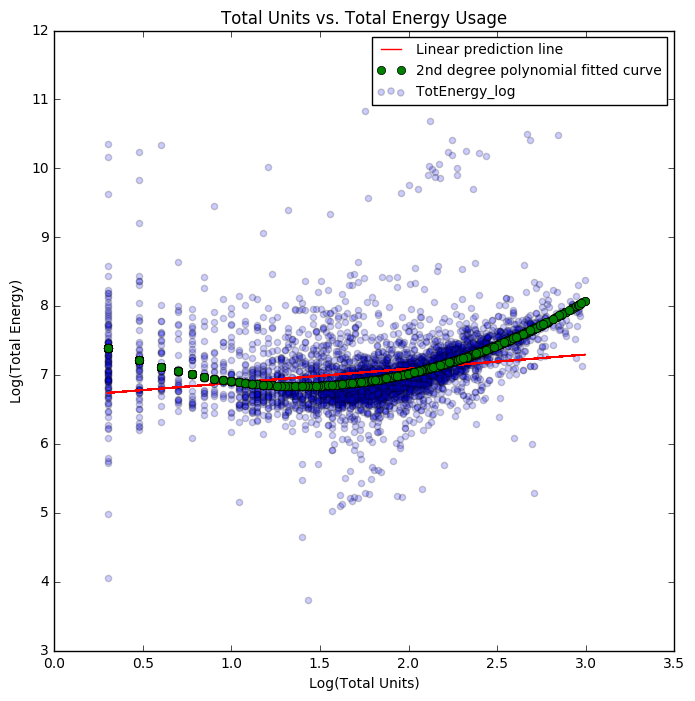

In [57]:
y_fit3 = model3.predict(X3)
pl.figure(figsize=(8,8))
xlabel('Log(Total Units)')
ylabel('Log(Total Energy)')
pl.title('Total Units vs. Total Energy Usage')
pl.scatter(bblnrgdata_refined.UnitsTotal_log, y, alpha=.2, s=20 )
pl.plot(bblnrgdata_refined.UnitsTotal_log, y_fit, color = 'r', label = 'Linear prediction line')
pl.plot(bblnrgdata_refined.UnitsTotal_log, y_fit3, 'o', color ='g', label = '2nd degree polynomial fitted curve')
pl.legend(fontsize=10)
pl.show()

## Figure 9: The plot shows the plot of log of No. of units and log of Energy consumption, the linear model fitted prediction line and a second degree polynomial fitted curve  

## Likelihood ratio

In [58]:
# Calculating likelihood ratio
LR = -2 * (model.llf - model3.llf)
LR

735.46230673111768

In [60]:
# Calculating the same, directly from statsmodels package
model3.compare_lr_test(model)

(735.46230673111768, 5.8138069887005591e-162, 1.0)

The likelihood ratio result is consistant using the package as well as manual calculation. 

Also we can claim that the polynomial model fits the data significantly better than the linear one.

## Extra credit attempt

In [61]:
# Using the statsmodel. formula package. to check the ratio. 
param = smf.ols(formula = 'TotEnergy_log ~ UnitsTotal_log + UnitsTotal_log_sq', 
                   data=bblnrgdata_refined).fit().compare_lr_test(smf.ols(formula = 'TotEnergy_log ~ UnitsTotal_log', 
                                                                                 data=bblnrgdata_refined).fit())
print(param)

(735.46230673111768, 5.8138069887005591e-162, 1.0)


The likelihood ratio is confirmed by all the three ways. 

In [62]:
# Define a function to compute the error given a dependent, an independent variable, and the values a, b for slope and intercept
def minimize_error(y, x, a, b):
    '''Calculates predictions given an independent variable, slope and intercept values.
    Returns the sum of square errors'''
    prediction = a*x + b
    return np.sum(((prediction - y)**2)/(np.sqrt(y))**2)

In [66]:
B = np.arange (-100.0, 100.0, 1.0)
A = np.arange(-50.0, 50.0, 0.5) 

Lsurface = np.zeros((len(A), len(A)))

for i,a in enumerate(A): 
    for j,b in enumerate(B): 
             Lsurface[i][j] = minimize_error(bblnrgdata_refined.TotEnergy_log, bblnrgdata_refined.UnitsTotal_log, a, b)

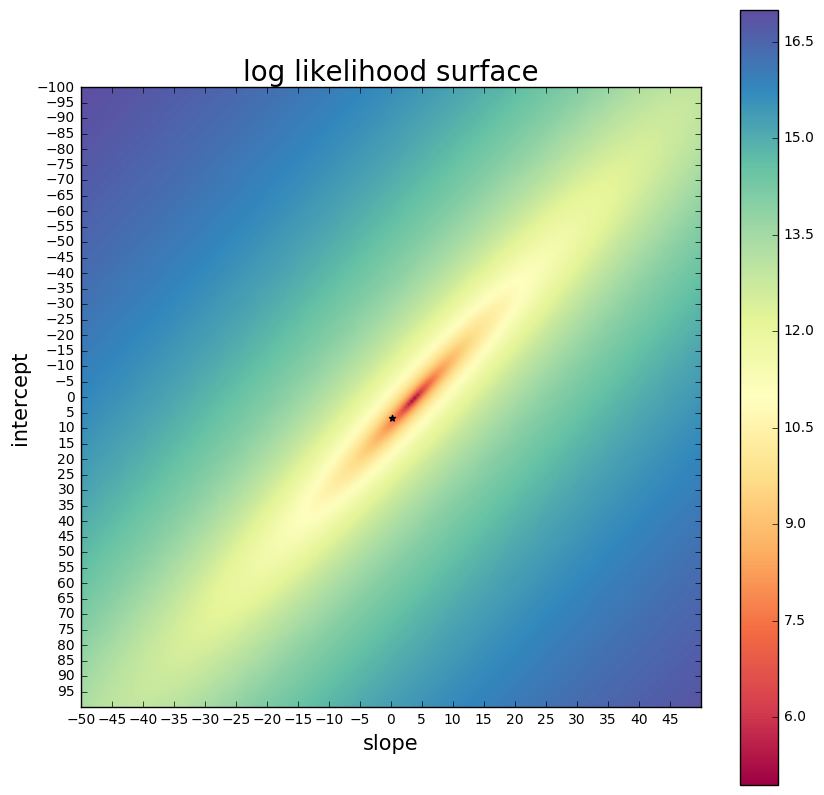

In [77]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 20)
pl.scatter(model.params[1], model.params[0],marker='*')
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], cmap=cm.Spectral, aspect=0.5)
pl.xticks(np.arange(-50.0, 50.0, 5))
pl.yticks(np.arange(-100.0, 100.0, 5))
pl.xlabel('slope', fontsize = 15)
pl.ylabel('intercept', fontsize = 15)
pl.colorbar()

## Figure 10: The log likelihood surface shows the maximum likelihood for the parameters which would fit the data perfectly. 
### The point in the given figure is the slope and intercept values obtained from the regression model and minimize the error. 
Notice that the point is very close to the "dark red" region. The reason why it doesnt fall exaclty inside is the level of granularity chosen in the selection of various slopes and intercepts.

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

In [27]:
df1 = nrg[['BBL', 'site_eui_kbtu_ft2', 'reported_property_floor_area_building_s_ft']]
df2 = bsize[['BBL','YearBuilt', 'NumFloors']]
data = pd.merge(df1, df2, on='BBL')
data.head(3)

,BBL,site_eui_kbtu_ft2,reported_property_floor_area_building_s_ft,YearBuilt,NumFloors
0,1.006700e+09,NaN,NaN,1987,2.0
1,1.004370e+09,NaN,NaN,1920,4.0
2,1.013110e+09,125.4,330000.0,1977,32.0


In [28]:
data = data.dropna()
data['Age']= 2016-data.YearBuilt
data.head(3)

,BBL,site_eui_kbtu_ft2,reported_property_floor_area_building_s_ft,YearBuilt,NumFloors,Age
2,1.013110e+09,125.4,330000.0,1977,32.0,39
10,1.010140e+09,154.9,841709.0,1999,32.0,17
15,1.007660e+09,122.3,59468.0,1912,8.0,104


In [29]:
data.describe()

,BBL,site_eui_kbtu_ft2,reported_property_floor_area_building_s_ft,YearBuilt,NumFloors,Age
count,5.069000e+03,5.069000e+03,5.069000e+03,5069.000000,5069.000000,5069.000000
mean,1.012005e+09,1.163451e+03,2.151997e+05,1938.172421,15.718879,77.827579
std,5.512017e+06,4.275870e+04,3.255770e+05,106.838327,10.302383,106.838327
min,1.000048e+09,0.000000e+00,1.000000e+03,0.000000,0.000000,1.000000
25%,1.008260e+09,6.590000e+01,7.216200e+04,1920.000000,8.000000,51.000000
50%,1.012368e+09,8.300000e+01,1.164430e+05,1930.000000,13.000000,86.000000
75%,1.015140e+09,1.040000e+02,2.213150e+05,1965.000000,19.000000,96.000000
max,1.022500e+09,3.018493e+06,9.515627e+06,2015.000000,85.000000,2016.000000


In [30]:
data = data[(data['site_eui_kbtu_ft2']> 50) & (data['site_eui_kbtu_ft2']<500) & 
                            (data['Age']<150) & (data['NumFloors']>0)]

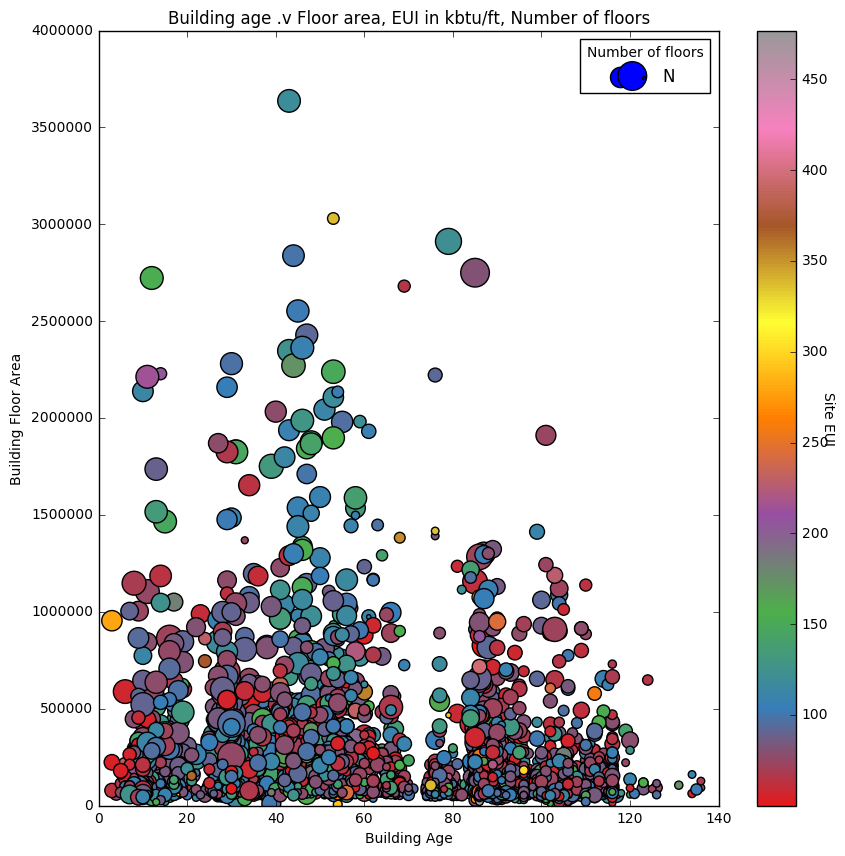

In [105]:
pl.figure(figsize=(10,10)) 
pl.scatter(data['Age'],data['reported_property_floor_area_building_s_ft'], 
           s=5*data['NumFloors'], c = data['site_eui_kbtu_ft2'], cmap = 'Set1')
pl.legend('N',title = 'Number of floors')
pl.xlabel('Building Age')
pl.ylabel('Building Floor Area')
pl.title('Building age .v Floor area, EUI in kbtu/ft, Number of floors')
pl.ylim(0, 0.4e7)
pl.xlim(0,140)
cbar = pl.colorbar()
cbar.ax.set_ylabel('Site EUI', rotation=270)

## Figure 11: This plot shows building age plotted against the total floor area reported. The size of the marker shows the number of floors existing in the building and colorbar the building's EUI.
#### We observe no significant clusters of EUI based on building size and age. 
#### Also one observation is that the slot around 70 to 80 years back, when the number of buildings build is low and also no large building were build.

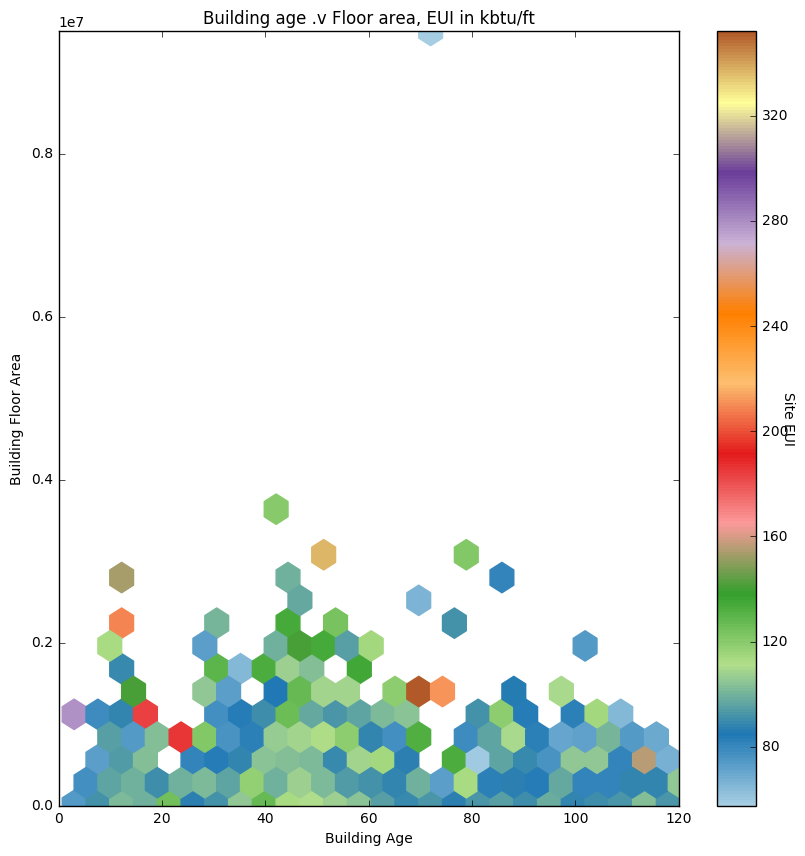

In [45]:
pl.figure(figsize=(10,10)) 
pl.hexbin(data['Age'],data['reported_property_floor_area_building_s_ft'], 
           C= data['site_eui_kbtu_ft2'],gridsize = 30, cmap = 'Paired')
#pl.ylim(0, 0.4e7)
pl.xlim(0,120)
pl.xlabel('Building Age')
pl.ylabel('Building Floor Area')
pl.title('Building age .v Floor area, EUI in kbtu/ft')
cbar = pl.colorbar()
cbar.ax.set_ylabel('Site EUI', rotation=270)

## Figure 12: Plot showing the Building Age against Building Floor Area, the colorbar shows  the site Energy unit Intensity (kbtu/ft2)

There are certain newer building( around 20year old) with low floor area and high EUI. 
